# CIELuv Chromaticity diagram data plot

Each value is plotted with its corresponding color (RGB) in the CIE 1976 Chromaticity diagram. This data corresponds to the color selections of a observer.

In [38]:
# Import packages
import pandas as pd
import colour
from colour.plotting import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from colormath.color_conversions import convert_color
from colormath.color_objects import XYZColor
from colour.utilities import is_trimesh_installed

In [39]:
# Read the data

# Each 6 points corresponds with one hue
# Whithin 6 points: 2 values [x,100,100; x,67,100; x,33,100; x,100,50; x,67,50; x,33,50]; 
data1 = pd.read_csv('./DATA/1_Selections.csv')
df1 = pd.DataFrame(data1)

## CIELuv

In [40]:
# Color selections in Luv
# Matrix consecutive values
data_P1 = pd.concat([df1.iloc[0:31, 7:9]], axis=1)
data_P1.head()

,u',v'
0,0.4464,0.5232
1,0.3435,0.5165
2,0.2692,0.5089
3,0.4383,0.5212
4,0.3363,0.5112


## XYZ to sRGB

In [41]:
data_P1_XYZ = pd.concat([df1.iloc[62:93, 2:5]], axis=1)
data_P1_XYZ.head()

,X,Y,Z
62,47.38,26.03,7.75
63,49.97,29.64,9.94
64,56.72,39.39,14.66
65,9.95,5.50,1.81
66,9.99,6.02,2.23


In [42]:
# Transform into sRGB
data_P1_RGB = colour.XYZ_to_sRGB(data_P1_XYZ)

### Data Division

In [43]:
# Print the data
print(data_P1.shape)
data_P1.head()
# Rows: 31 which means 5 hues X 6 points + 1 (Grey)

(31, 2)


,u',v'
0,0.4464,0.5232
1,0.3435,0.5165
2,0.2692,0.5089
3,0.4383,0.5212
4,0.3363,0.5112


# Data plotting

In [44]:
# Normalize the values
data_P1_RGB = data_P1_RGB/data_P1_RGB.max()

In [45]:
# Change into np.array
data_P1_np = data_P1.to_numpy()

In [46]:
data_P1_RGB = np.where(data_P1_RGB<0, 0, data_P1_RGB)
np.array(data_P1_RGB)

array([[ 0.9724012 ,  0.218669  ,  0.27475189],
       [ 0.97889191,  0.31483787,  0.3085339 ],
       [ 0.9954145 ,  0.47022586,  0.36310271],
       [ 0.50273493,  0.11562258,  0.14935986],
       [ 0.49447986,  0.16562559,  0.16477491],
       [ 0.49457428,  0.23454031,  0.1905654 ],
       [ 0.53672433,  0.65902437,  0.1625576 ],
       [ 0.65734483,  0.65643394,  0.2897602 ],
       [ 0.78948747,  0.64451969,  0.37786603],
       [ 0.26986416,  0.33008764,  0.08141238],
       [ 0.33521663,  0.32520458,  0.10962674],
       [ 0.40078789,  0.32057827,  0.17732086],
       [ 0.24721742,  0.24102153,  0.47637483],
       [ 0.44405201,  0.38125189,  0.47052705],
       [ 0.7040213 ,  0.51497837,  0.46317124],
       [ 0.21061286,  0.11872399,  0.25915539],
       [ 0.26597136,  0.19805099,  0.24987614],
       [ 0.36015974,  0.26189094,  0.2417095 ],
       [ 0.98425597,  0.37493273,  0.24134238],
       [ 0.98969062,  0.42574796,  0.27992373],
       [ 1.        ,  0.50465094,  0.350

In [47]:
# Chromaticity diagram
p = colour.plotting.diagrams.plot_chromaticity_diagram_colours(
    diagram_colours='RGB', method='CIE 1976 UCS', bounding_box=(0, 0.63, 0,0.6), diagram_opacity=0.3)

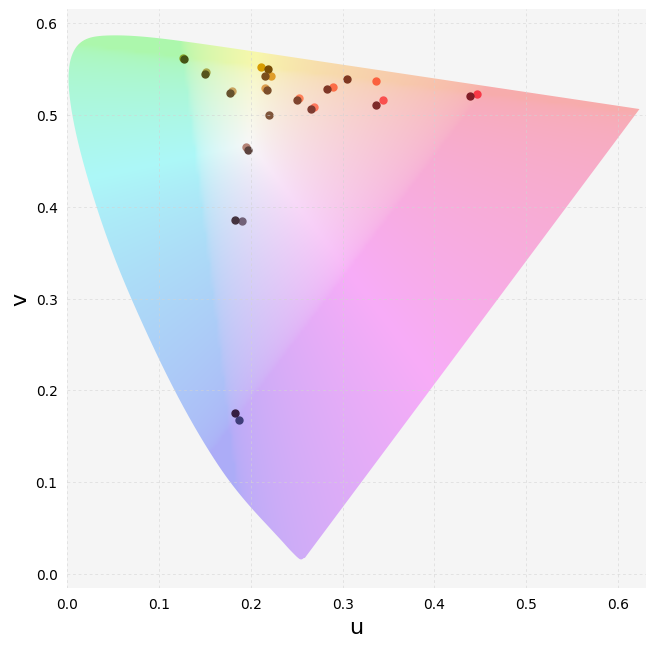

In [48]:
# Plotting data
plt.rcParams["figure.dpi"] = 100

x = np.array(data_P1_np[:, 0])
y = np.array(data_P1_np[:, 1])
colors = data_P1_RGB
area = (5)**2 

ax = p[1]

for i in range(len(x)):
    ax.scatter(x[i], y[i], s=area, color=colors[i], alpha=1)

# PLOT STYLE
# Background color
ax.set_facecolor('whitesmoke')
# Grid
ax.grid(visible=True)
ax.grid(color='lightgrey', linestyle=(0,(5,5)), linewidth=0.4, alpha=1)
ax.set_box_aspect(1)
# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.left.set_visible(False)
ax.tick_params(which='both', width=0)
# Limits
start, end = ax.get_xlim()
# Labels
ax.set_ylabel('v', fontsize=16)
ax.set_xlabel('u', fontsize=16)
# Show the plot
p[0]